In [22]:
!pip install scikit-posthocs

In [23]:
import pandas as pd
import os

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from google.colab import drive
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.utils import resample
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
'''
# Montar o Google Drive para acessar os arquivos
drive.mount('/content/drive')

# Carregar dados do arquivo CSV
#file_path = '/content/drive/MyDrive/Mestrado/metrics_results/metrics_results_w7784.csv'  # Substitua pelo caminho do seu arquivo
#dt = pd.read_csv(file_path)  # Certifique-se de que o índice seja carregado como uma coluna
'''

Mounted at /content/drive


In [ ]:
'''
# Caminho para o arquivo CSV
file_path = '/content/drive/MyDrive/Mestrado/metrics_results03/metrics_results_03_w7784.csv'
dt = pd.read_csv(file_path)

# Nome do método que deseja extrair (exemplo: 'Full Conformal')
method_name = 'Full Conformal'  # Substitua pelo método desejado

# Selecionar diretamente as linhas pelas posições para RMSE (3), R² (4) e MAE (5)
# Como as métricas estão em ordem e sabemos que RMSE está na linha 3, R² na 4, e MAE na 5
metrics_df = pd.DataFrame({
    'RMSE': eval(dt[method_name].iloc[3]),  # Linha 3 para RMSE
    'R2': eval(dt[method_name].iloc[4]),    # Linha 4 para R²
    'MAE': eval(dt[method_name].iloc[5])    # Linha 5 para MAE
})

# Visualizar as primeiras linhas para verificar o resultado
print(metrics_df.head())

# Opcional: Salvar o DataFrame resultante em um novo arquivo CSV
output_path = '/content/drive/MyDrive/Mestrado/metrics_results03/model_results_03_w7784.csv'
metrics_df.to_csv(output_path, index=False)

import matplotlib.pyplot as plt

# Gerar box-plots para as métricas extraídas
plt.figure(figsize=(12, 6))

# Criar um subplot para cada métrica
plt.subplot(1, 3, 1)
plt.boxplot(metrics_df['RMSE'])
plt.title('Box-Plot de RMSE')
plt.ylabel('Valor')

plt.subplot(1, 3, 2)
plt.boxplot(metrics_df['R2'])
plt.title('Box-Plot de R²')
plt.ylabel('Valor')

plt.subplot(1, 3, 3)
plt.boxplot(metrics_df['MAE'])
plt.title('Box-Plot de MAE')
plt.ylabel('Valor')

# Ajustar layout
plt.tight_layout()
plt.show()
'''

BOX-PLOTS RMSE POR JANELA

In [ ]:
### upload arquivo
from google.colab import files
uploaded = files.upload()

In [ ]:
# Colunas de interesse para o boxplot
colunas_de_interesse = ['SW100', 'SW150', 'SW190', 'SW250', 'SW360', 'SW720']  # Ajuste se necessário

# Verificar se as colunas existem no DataFrame
for col in colunas_de_interesse:
    if col not in df.columns:
        raise ValueError(f"A coluna {col} não foi encontrada no arquivo Excel.")

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de cores pastel do Seaborn
palette = sns.color_palette("pastel", len(colunas_de_interesse))  # Uma cor para cada coluna

# Configurar o estilo do gráfico
plt.rcParams.update({
    "font.family": "serif",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.grid": True,
    "grid.color": "gray",
    "grid.alpha": 0.5,
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "font.size": 12,
    "text.usetex": False  # Desativar o uso de LaTeX
})

# Gerar o boxplot
fig, ax = plt.subplots(figsize=(7.16, 4))
box = df[colunas_de_interesse].boxplot(ax=ax, patch_artist=True, return_type='dict')

# Aplicar a paleta pastel às caixas
for patch, color in zip(box['boxes'], palette):
    patch.set_facecolor(color)

# Personalizar as propriedades restantes
for whisker in box['whiskers']:
    whisker.set(color="black", linewidth=1.2)
for cap in box['caps']:
    cap.set(color="black", linewidth=1.2)
for median in box['medians']:
    median.set(color="orange", linewidth=1.5)

# Adicionar título e rótulos
ax.set_xlabel('Window Size', fontsize=16)
ax.set_ylabel('RMSE (t/h)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=10, width=1)

# Salvar o gráfico como PDF antes de exibir
plt.savefig('boxplot_window_size.pdf', format='pdf', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Fazer o download do arquivo PDF
files.download('boxplot_window_size.pdf')

BOX-PLOTS MAE POR JANELA

In [ ]:
### upload arquivo
from google.colab import files
uploaded = files.upload()

Saving MAE_RESULTS.xlsx to MAE_RESULTS.xlsx


In [ ]:
df = pd.read_excel('MAE_RESULTS.xlsx')
df

,SW100,SW150,SW190,SW250,SW360,SW720
0,46.760528,43.396748,38.901052,39.327307,38.344751,34.096013
1,31.241638,33.564527,37.991893,31.413030,30.173921,33.976875
2,38.517433,36.408241,25.065012,30.554817,18.413591,35.664026
3,41.988766,30.024513,31.685574,16.691453,50.857124,45.106065
4,17.493240,24.923683,15.424406,55.930219,39.402562,33.386194
...,...,...,...,...,...,...
72,27.986588,NaN,NaN,NaN,NaN,NaN
73,25.027409,NaN,NaN,NaN,NaN,NaN
74,23.004978,NaN,NaN,NaN,NaN,NaN
75,42.313459,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Colunas de interesse para o boxplot
colunas_de_interesse = ['SW100', 'SW150', 'SW190', 'SW250', 'SW360', 'SW720']  # Ajuste se necessário

# Verificar se as colunas existem no DataFrame
for col in colunas_de_interesse:
    if col not in df.columns:
        raise ValueError(f"A coluna {col} não foi encontrada no arquivo Excel.")


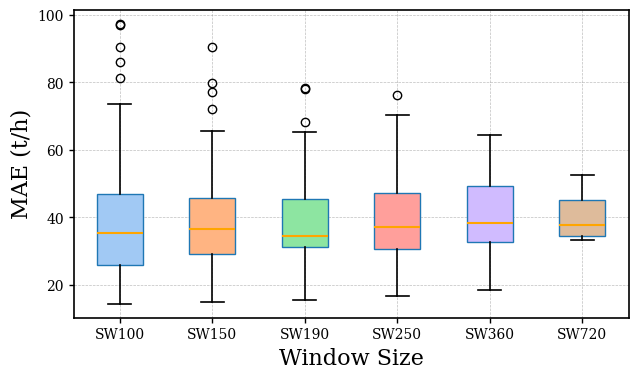

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de cores pastel do Seaborn
palette = sns.color_palette("pastel", len(colunas_de_interesse))  # Uma cor para cada coluna

# Configurar o estilo do gráfico
plt.rcParams.update({
    "font.family": "serif",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.grid": True,
    "grid.color": "gray",
    "grid.alpha": 0.5,
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "font.size": 12,
    "text.usetex": False  # Desativar o uso de LaTeX
})

# Gerar o boxplot
fig, ax = plt.subplots(figsize=(7.16, 4))
box = df[colunas_de_interesse].boxplot(ax=ax, patch_artist=True, return_type='dict')

# Aplicar a paleta pastel às caixas
for patch, color in zip(box['boxes'], palette):
    patch.set_facecolor(color)

# Personalizar as propriedades restantes
for whisker in box['whiskers']:
    whisker.set(color="black", linewidth=1.2)
for cap in box['caps']:
    cap.set(color="black", linewidth=1.2)
for median in box['medians']:
    median.set(color="orange", linewidth=1.5)

# Adicionar título e rótulos
ax.set_xlabel('Window Size', fontsize=16)
ax.set_ylabel('MAE (t/h)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=10, width=1)

# Salvar o gráfico como PDF antes de exibir
plt.savefig('boxplot_window_size.pdf', format='pdf', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Fazer o download do arquivo PDF
files.download('boxplot_window_size.pdf')



SHAPIRO-WILK TEST para verificar a normalidade Dados de Cobertura


In [31]:
### upload arquivo
from google.colab import files
uploaded = files.upload()

Saving cobertura_results.xlsx to cobertura_results.xlsx


In [32]:
import os

# Remover o arquivo antigo, se ainda existir
if os.path.exists("cobertura_results.xlsx"):
    os.remove("cobertura_results.xlsx")

In [33]:
from google.colab import files
uploaded = files.upload()  # Refaça o upload do arquivo atualizado

Saving cobertura_results.xlsx to cobertura_results.xlsx


In [34]:
df = pd.read_excel('cobertura_results.xlsx')
df

,T-Student,Full,Bootstrap,Split
0,0.964547,0.946179,0.945022,0.947463
1,0.968658,0.947335,0.944123,0.949647
2,0.965061,0.946179,0.944380,0.947078
3,0.964419,0.943610,0.941940,0.941940
4,0.964547,0.946435,0.943481,0.946821
5,0.963520,0.945022,0.942325,0.945408
6,0.964804,0.945279,0.944252,0.948619
7,0.965703,0.950803,0.948491,0.951317
8,0.964290,0.943995,0.941811,0.945279
9,0.965061,0.944637,0.942839,0.948748


In [35]:
from scipy.stats import shapiro

# Selecionar as colunas desejadas como uma lista
columns = ['T-Student', 'Full', 'Bootstrap', 'Split']

# Iterar sobre cada coluna e aplicar o teste Shapiro-Wilk
for column in columns:
    data = df[column]  # Selecionar os dados da coluna
    stat, p_value = shapiro(data)
    print(f"Coluna: {column}")
    print(f"Estatística do teste: {stat}")
    print(f"P-valor: {p_value}")
    if p_value > 0.05:
        print("Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.\n")
    else:
        print("Rejeitamos a hipótese nula: os dados não seguem uma distribuição normal.\n")

Coluna: T-Student
Estatística do teste: 0.9631702402337733
P-valor: 0.3723064497808329
Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.

Coluna: Full
Estatística do teste: 0.91768897202549
P-valor: 0.023372462762692194
Rejeitamos a hipótese nula: os dados não seguem uma distribuição normal.

Coluna: Bootstrap
Estatística do teste: 0.9296554855443813
P-valor: 0.04807964243922061
Rejeitamos a hipótese nula: os dados não seguem uma distribuição normal.

Coluna: Split
Estatística do teste: 0.9950884400529731
P-valor: 0.9999385085522491
Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.



O Teste de Kruskal-Wallis: pra determina se há diferenças significativas entre os grupos. E o Teste de Dunn: Pra identificar quais grupos específicos apresentam diferenças significativas.  O ajuste de Bonferroni é usado para evitar falsos positivos.

In [36]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

# Supondo que você tenha carregado seus dados no DataFrame `df`
# Certifique-se de que as colunas correspondem aos grupos mencionados
columns = ['T-Student', 'Full', 'Bootstrap', 'Split']
data = df[columns]

# Separar os valores de cada grupo
t_student = data['T-Student']
full = data['Full']
bootstrap = data['Bootstrap']
split = data['Split']

# Aplicar o teste de Kruskal-Wallis
stat, p_value = kruskal(t_student, full, bootstrap, split)
print(f"Estatística do teste: {stat}")
print(f"P-valor: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: pelo menos um dos grupos é diferente.")
else:
    print("Não rejeitamos a hipótese nula: todos os grupos têm distribuições semelhantes.")

# Organizar os dados no formato longo para o teste de Dunn
data_long = pd.melt(data.reset_index(), id_vars=['index'], value_vars=columns)
data_long.columns = ['Index', 'Group', 'Value']

# Verificar se as colunas foram configuradas corretamente
assert 'Value' in data_long.columns, "A coluna 'Value' não está no DataFrame."
assert 'Group' in data_long.columns, "A coluna 'Group' não está no DataFrame."

# Aplicar o teste de Dunn com ajuste Bonferroni
posthoc = sp.posthoc_dunn(data_long, val_col='Value', group_col='Group', p_adjust='bonferroni')

print("\nResultados do teste de Dunn (pós-hoc):")
print(posthoc)

Estatística do teste: 76.58908830711401
P-valor: 1.6537796738156775e-16
Rejeitamos a hipótese nula: pelo menos um dos grupos é diferente.

Resultados do teste de Dunn (pós-hoc):
              Bootstrap          Full         Split     T-Student
Bootstrap  1.000000e+00  1.556254e-01  1.704951e-02  2.285879e-16
Full       1.556254e-01  1.000000e+00  1.000000e+00  3.576479e-09
Split      1.704951e-02  1.000000e+00  1.000000e+00  3.301930e-07
T-Student  2.285879e-16  3.576479e-09  3.301930e-07  1.000000e+00


SHAPIRO-WILK TEST para verificar a normalidade Dados de Largura

In [37]:
### upload arquivo
from google.colab import files
uploaded = files.upload()

Saving largura_results.xlsx to largura_results.xlsx


In [38]:
df = pd.read_excel('largura_results.xlsx')
df

,T-Student,Full,Bootstrap,Split
0,184.620987,167.625282,166.791148,168.385389
1,186.675709,167.247801,166.597224,169.097890
2,185.583765,167.009232,166.432296,167.345568
3,185.506697,167.041475,166.350185,165.892895
4,185.221294,167.095478,166.344923,167.324989
5,184.214151,166.721046,166.063661,167.003026
6,184.834997,166.956464,166.556331,169.775279
7,184.484783,167.524400,166.796733,168.202183
8,185.510432,167.270390,166.614178,168.865380
9,185.995950,167.149773,166.568806,169.883432


In [39]:
from scipy.stats import shapiro

# Selecionar as colunas desejadas como uma lista
columns = ['T-Student', 'Full', 'Bootstrap', 'Split']

# Iterar sobre cada coluna e aplicar o teste Shapiro-Wilk
for column in columns:
    data = df[column]  # Selecionar os dados da coluna
    stat, p_value = shapiro(data)
    print(f"Coluna: {column}")
    print(f"Estatística do teste: {stat}")
    print(f"P-valor: {p_value}")
    if p_value > 0.05:
        print("Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.\n")
    else:
        print("Rejeitamos a hipótese nula: os dados não seguem uma distribuição normal.\n")

Coluna: T-Student
Estatística do teste: 0.9549162395276601
P-valor: 0.22847592081596485
Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.

Coluna: Full
Estatística do teste: 0.9714101280595473
P-valor: 0.5784404407696393
Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.

Coluna: Bootstrap
Estatística do teste: 0.9708717436498938
P-valor: 0.5632954378304873
Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.

Coluna: Split
Estatística do teste: 0.9352703619687355
P-valor: 0.06788083921432585
Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.



O Teste de Kruskal-Wallis: pra determina se há diferenças significativas entre os grupos. E o Teste de Dunn: Pra identificar quais grupos específicos apresentam diferenças significativas.  O ajuste de Bonferroni é usado para evitar falsos positivos.

In [40]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

# Supondo que você tenha carregado seus dados no DataFrame `df`
# Certifique-se de que as colunas correspondem aos grupos mencionados
columns = ['T-Student', 'Full', 'Bootstrap', 'Split']
data = df[columns]

# Separar os valores de cada grupo
t_student = data['T-Student']
full = data['Full']
bootstrap = data['Bootstrap']
split = data['Split']

# Aplicar o teste de Kruskal-Wallis
stat, p_value = kruskal(t_student, full, bootstrap, split)
print(f"Estatística do teste: {stat}")
print(f"P-valor: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: pelo menos um dos grupos é diferente.")
else:
    print("Não rejeitamos a hipótese nula: todos os grupos têm distribuições semelhantes.")

# Organizar os dados no formato longo para o teste de Dunn
data_long = pd.melt(data.reset_index(), id_vars=['index'], value_vars=columns)
data_long.columns = ['Index', 'Group', 'Value']

# Verificar se as colunas foram configuradas corretamente
assert 'Value' in data_long.columns, "A coluna 'Value' não está no DataFrame."
assert 'Group' in data_long.columns, "A coluna 'Group' não está no DataFrame."

# Aplicar o teste de Dunn com ajuste Bonferroni
posthoc = sp.posthoc_dunn(data_long, val_col='Value', group_col='Group', p_adjust='bonferroni')

print("\nResultados do teste de Dunn (pós-hoc):")
print(posthoc)

Estatística do teste: 86.32280991735536
P-valor: 1.3495508449553471e-18
Rejeitamos a hipótese nula: pelo menos um dos grupos é diferente.

Resultados do teste de Dunn (pós-hoc):
              Bootstrap          Full     Split     T-Student
Bootstrap  1.000000e+00  1.936681e-03  0.000385  1.928408e-19
Full       1.936681e-03  1.000000e+00  1.000000  1.177536e-07
Split      3.847037e-04  1.000000e+00  1.000000  1.106216e-06
T-Student  1.928408e-19  1.177536e-07  0.000001  1.000000e+00


SHAPIRO-WILK TEST para verificar a normalidade Dados de Cobertura COM SW190

In [41]:
### upload arquivo
from google.colab import files
uploaded = files.upload()

Saving coberturaSW_results.xlsx to coberturaSW_results (1).xlsx


In [42]:
df = pd.read_excel('coberturaSW_results.xlsx')
df

,T-Student,Full,Bootstrap,Split
0,0.947368,0.947368,0.921053,0.947368
1,1.000000,0.989474,0.989474,0.989474
2,1.000000,1.000000,1.000000,1.000000
3,0.989474,0.936842,0.926316,0.963158
4,1.000000,1.000000,1.000000,1.000000
5,0.905263,0.894737,0.894737,0.894737
6,1.000000,1.000000,0.994737,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,0.952632,0.915789,0.926316,0.921053
9,0.973684,0.910526,0.910526,0.931579


In [43]:
from scipy.stats import shapiro

# Selecionar as colunas desejadas como uma lista
columns = ['T-Student', 'Full', 'Bootstrap', 'Split']

# Iterar sobre cada coluna e aplicar o teste Shapiro-Wilk
for column in columns:
    data = df[column]  # Selecionar os dados da coluna
    stat, p_value = shapiro(data)
    print(f"Coluna: {column}")
    print(f"Estatística do teste: {stat}")
    print(f"P-valor: {p_value}")
    if p_value > 0.05:
        print("Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.\n")
    else:
        print("Rejeitamos a hipótese nula: os dados não seguem uma distribuição normal.\n")

Coluna: T-Student
Estatística do teste: 0.6246903128160427
P-valor: 6.907701125661946e-09
Rejeitamos a hipótese nula: os dados não seguem uma distribuição normal.

Coluna: Full
Estatística do teste: 0.6610879328829828
P-valor: 2.36748825696579e-08
Rejeitamos a hipótese nula: os dados não seguem uma distribuição normal.

Coluna: Bootstrap
Estatística do teste: 0.6713176957819711
P-valor: 3.397917289470247e-08
Rejeitamos a hipótese nula: os dados não seguem uma distribuição normal.

Coluna: Split
Estatística do teste: 0.6335121568040487
P-valor: 9.242963012298098e-09
Rejeitamos a hipótese nula: os dados não seguem uma distribuição normal.



O Teste de Kruskal-Wallis: pra determina se há diferenças significativas entre os grupos. E o Teste de Dunn: Pra identificar quais grupos específicos apresentam diferenças significativas.  O ajuste de Bonferroni é usado para evitar falsos positivos.

In [44]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

# Supondo que você tenha carregado seus dados no DataFrame `df`
# Certifique-se de que as colunas correspondem aos grupos mencionados
columns = ['T-Student', 'Full', 'Bootstrap', 'Split']
data = df[columns]

# Separar os valores de cada grupo
t_student = data['T-Student']
full = data['Full']
bootstrap = data['Bootstrap']
split = data['Split']

# Aplicar o teste de Kruskal-Wallis
stat, p_value = kruskal(t_student, full, bootstrap, split)
print(f"Estatística do teste: {stat}")
print(f"P-valor: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: pelo menos um dos grupos é diferente.")
else:
    print("Não rejeitamos a hipótese nula: todos os grupos têm distribuições semelhantes.")

# Organizar os dados no formato longo para o teste de Dunn
data_long = pd.melt(data.reset_index(), id_vars=['index'], value_vars=columns)
data_long.columns = ['Index', 'Group', 'Value']

# Verificar se as colunas foram configuradas corretamente
assert 'Value' in data_long.columns, "A coluna 'Value' não está no DataFrame."
assert 'Group' in data_long.columns, "A coluna 'Group' não está no DataFrame."

# Aplicar o teste de Dunn com ajuste Bonferroni
posthoc = sp.posthoc_dunn(data_long, val_col='Value', group_col='Group', p_adjust='bonferroni')

print("\nResultados do teste de Dunn (pós-hoc):")
print(posthoc)

Estatística do teste: 3.7307277770510314
P-valor: 0.292047122412925
Não rejeitamos a hipótese nula: todos os grupos têm distribuições semelhantes.

Resultados do teste de Dunn (pós-hoc):
           Bootstrap      Full  Split  T-Student
Bootstrap   1.000000  1.000000    1.0   0.400676
Full        1.000000  1.000000    1.0   0.893429
Split       1.000000  1.000000    1.0   1.000000
T-Student   0.400676  0.893429    1.0   1.000000


SHAPIRO-WILK TEST para verificar a normalidade Dados de Largura COM SW190

In [45]:
### upload arquivo
from google.colab import files
uploaded = files.upload()

Saving larguraSW_results.xlsx to larguraSW_results (3).xlsx


In [46]:
df = pd.read_excel('larguraSW_results.xlsx')
df

,T-Student,Full,Bootstrap,Split
0,183.207775,165.771081,165.176955,175.095944
1,183.256359,165.419548,164.595885,176.674630
2,183.376244,165.790406,165.050246,176.274274
3,183.148252,165.338097,164.877698,176.191070
4,183.369564,165.741957,166.014156,175.625693
5,182.886845,165.454019,164.137384,171.541959
6,184.602230,165.528944,165.620165,174.158910
7,184.589334,165.577537,164.755009,171.735039
8,184.465496,166.247937,165.046462,169.120018
9,184.605867,166.374742,165.652012,170.409314


O Teste de Kruskal-Wallis: pra determina se há diferenças significativas entre os grupos. E o Teste de Dunn: Pra identificar quais grupos específicos apresentam diferenças significativas.  O ajuste de Bonferroni é usado para evitar falsos positivos.

In [47]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

# Supondo que você tenha carregado seus dados no DataFrame `df`
# Certifique-se de que as colunas correspondem aos grupos mencionados
columns = ['T-Student', 'Full', 'Bootstrap', 'Split']
data = df[columns]

# Separar os valores de cada grupo
t_student = data['T-Student']
full = data['Full']
bootstrap = data['Bootstrap']
split = data['Split']

# Aplicar o teste de Kruskal-Wallis
stat, p_value = kruskal(t_student, full, bootstrap, split)
print(f"Estatística do teste: {stat}")
print(f"P-valor: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: pelo menos um dos grupos é diferente.")
else:
    print("Não rejeitamos a hipótese nula: todos os grupos têm distribuições semelhantes.")

# Organizar os dados no formato longo para o teste de Dunn
data_long = pd.melt(data.reset_index(), id_vars=['index'], value_vars=columns)
data_long.columns = ['Index', 'Group', 'Value']

# Verificar se as colunas foram configuradas corretamente
assert 'Value' in data_long.columns, "A coluna 'Value' não está no DataFrame."
assert 'Group' in data_long.columns, "A coluna 'Group' não está no DataFrame."

# Aplicar o teste de Dunn com ajuste Bonferroni
posthoc = sp.posthoc_dunn(data_long, val_col='Value', group_col='Group', p_adjust='bonferroni')

print("\nResultados do teste de Dunn (pós-hoc):")
print(posthoc)

Estatística do teste: 115.17211956521737
P-valor: 8.453346043739609e-25
Rejeitamos a hipótese nula: pelo menos um dos grupos é diferente.

Resultados do teste de Dunn (pós-hoc):
              Bootstrap          Full     Split     T-Student
Bootstrap  1.000000e+00  1.000000e+00  0.000006  7.117973e-22
Full       1.000000e+00  1.000000e+00  0.001997  1.413436e-16
Split      5.514522e-06  1.997368e-03  1.000000  6.158721e-06
T-Student  7.117973e-22  1.413436e-16  0.000006  1.000000e+00
